In [5]:
# PASSO 1: Preparar o ambiente
!pip install pandas-gbq --quiet
import pandas as pd
from pandas_gbq import read_gbq

# PASSO 2: Configurar seu projeto (FÁCIL)
# Vá em https://console.cloud.google.com/
# Veja o nome do projeto no topo da página (ex: "meu-projeto-123456")
# Cole entre as aspas abaixo:
project_id = 'bigquery-public-data-464623'  # <<< IMPORTANTE!

# PASSO 3: Extrair dados do Brasil automaticamente
query = """
SELECT
  date AS data,
  new_confirmed AS novos_casos,
  new_deceased AS novas_mortes
FROM
  `bigquery-public-data.covid19_open_data.covid19_open_data`
WHERE
  country_name = 'Brazil'
  AND date BETWEEN '2020-01-01' AND '2021-12-31'
ORDER BY date
"""

df = read_gbq(query, project_id=project_id)
print("Dados extraídos com sucesso!")
print(f"Total de registros: {len(df)}")

Downloading: 100%|██████████|
Dados extraídos com sucesso!
Total de registros: 4105296


In [6]:
# Salvar os dados completos (opcional - grande arquivo!)
df.to_csv('dados_completos_covid_brasil.csv', index=False)

# Salvar uma amostra menor (recomendado)
df_amostra = df.sample(10000)  # 10 mil linhas aleatórias
df_amostra.to_csv('amostra_covid_brasil.csv', index=False)
print("Amostra salva com sucesso!")

Amostra salva com sucesso!


In [7]:
# Ver as primeiras linhas
print("Primeiras linhas:")
print(df.head())

# Ver informações básicas
print("\nInformações do dataset:")
print(df.info())

# Estatísticas descritivas
print("\nEstatísticas básicas:")
print(df.describe())

Primeiras linhas:
         data  novos_casos  novas_mortes
0  2020-01-01            0          <NA>
1  2020-01-01            1          <NA>
2  2020-01-01         <NA>          <NA>
3  2020-01-01         <NA>          <NA>
4  2020-01-01         <NA>          <NA>

Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4105296 entries, 0 to 4105295
Data columns (total 3 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   data          dbdate
 1   novos_casos   Int64 
 2   novas_mortes  Int64 
dtypes: Int64(2), dbdate(1)
memory usage: 101.8 MB
None

Estatísticas básicas:
       novos_casos  novas_mortes
count    3647097.0     3614213.0
mean     19.490012      0.555163
std     610.091384      18.77662
min       -59429.0       -4109.0
25%            0.0           0.0
50%            0.0           0.0
75%            2.0           0.0
max       150106.0        4249.0


In [8]:
total_casos = df['novos_casos'].sum()
total_mortes = df['novas_mortes'].sum()
print(f"Total de casos no período: {total_casos:,}")
print(f"Total de mortes no período: {total_mortes:,}")

Total de casos no período: 71,081,963
Total de mortes no período: 2,006,477


In [9]:
dia_mais_casos = df.loc[df['novos_casos'].idxmax()]
print("\n📅 Dia com mais casos:")
print(f"Data: {dia_mais_casos['data']}")
print(f"Casos: {dia_mais_casos['novos_casos']:,}")


📅 Dia com mais casos:
Data: 2021-09-18
Casos: 150,106


In [10]:
# Calcular média móvel
df['media_movel_casos'] = df['novos_casos'].rolling(window=7).mean()

# Ver últimos dias
print("\nMédia móvel de casos (últimos 5 dias):")
print(df[['data', 'media_movel_casos']].tail())


Média móvel de casos (últimos 5 dias):
               data  media_movel_casos
4105291  2021-12-31          37.857143
4105292  2021-12-31          74.285714
4105293  2021-12-31          74.285714
4105294  2021-12-31          74.285714
4105295  2021-12-31          74.714286


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


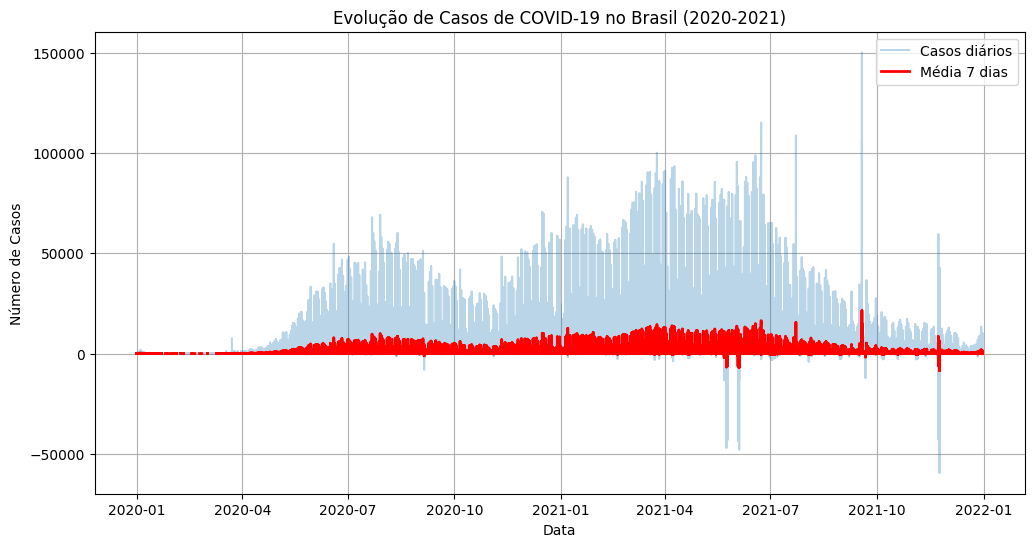

Gráfico salvo como 'evolucao_casos_brasil.png'


<Figure size 640x480 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt

# Configurar o gráfico
plt.figure(figsize=(12, 6))

# Plotar dados
plt.plot(df['data'], df['novos_casos'], alpha=0.3, label='Casos diários')
plt.plot(df['data'], df['media_movel_casos'], 'r-', linewidth=2, label='Média 7 dias')

# Adicionar detalhes
plt.title("Evolução de Casos de COVID-19 no Brasil (2020-2021)")
plt.xlabel("Data")
plt.ylabel("Número de Casos")
plt.grid(True)
plt.legend()

# Mostrar o gráfico
plt.show()

# Salvar o gráfico
plt.savefig('evolucao_casos_brasil.png')
print("Gráfico salvo como 'evolucao_casos_brasil.png'")

In [12]:
from google.colab import files

# Baixar arquivos para seu computador
files.download('amostra_covid_brasil.csv')  # Se criou a amostra
files.download('evolucao_casos_brasil.png')  # O gráfico gerado

# Se salvou os dados completos (cuidado - arquivo grande!)
# files.download('dados_completos_covid_brasil.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [16]:
# Verificar e converter tipos de dados
print("Antes da conversão:")
print(df.dtypes)

# Converter 'data' para datetime se necessário
if not pd.api.types.is_datetime64_any_dtype(df['data']):
    try:
        df['data'] = pd.to_datetime(df['data'])
        print("\n✅ Coluna 'data' convertida para datetime!")
    except Exception as e:
        print(f"\n⚠️ Erro na conversão: {e}")

print("\nDepois da conversão:")
print(df.dtypes)

Antes da conversão:
data                 datetime64[ns]
novos_casos                   Int64
novas_mortes                  Int64
media_movel_casos           float64
dtype: object

Depois da conversão:
data                 datetime64[ns]
novos_casos                   Int64
novas_mortes                  Int64
media_movel_casos           float64
dtype: object


In [17]:
# Criar coluna de mês/ano
if 'data' in df.columns:
    # Verificar o tipo da coluna
    if pd.api.types.is_datetime64_any_dtype(df['data']):
        df['mes_ano'] = df['data'].dt.strftime('%Y-%m')
    else:
        # Tentar converter para datetime se for string
        try:
            df['data'] = pd.to_datetime(df['data'])
            df['mes_ano'] = df['data'].dt.strftime('%Y-%m')
        except:
            # Se falhar, usar abordagem de string
            df['mes_ano'] = df['data'].str[:7]

    # Agrupar por mês
    mensal = df.groupby('mes_ano').agg({
        'novos_casos': 'sum',
        'novas_mortes': 'sum'
    }).reset_index()

    # Encontrar pior mês para casos
    if not mensal.empty:
        pior_mes_casos = mensal.loc[mensal['novos_casos'].idxmax()]
        print(f"\n🔥 Pior mês para casos: {pior_mes_casos['mes_ano']}")
        print(f"Total de casos: {pior_mes_casos['novos_casos']:,}")

        # Encontrar pior mês para mortes
        pior_mes_mortes = mensal.loc[mensal['novas_mortes'].idxmax()]
        print(f"\n💀 Pior mês para mortes: {pior_mes_mortes['mes_ano']}")
        print(f"Total de mortes: {pior_mes_mortes['novas_mortes']:,}")

        # Visualizar os 5 piores meses
        print("\n📊 Top 5 meses com mais casos:")
        print(mensal.sort_values('novos_casos', ascending=False).head(5))
    else:
        print("⚠️ Nenhum dado encontrado para agrupamento mensal")
else:
    print("⚠️ Coluna 'data' não encontrada no DataFrame")


🔥 Pior mês para casos: 2021-03
Total de casos: 7,022,234

💀 Pior mês para mortes: 2021-04
Total de mortes: 266,850

📊 Top 5 meses com mais casos:
    mes_ano  novos_casos  novas_mortes
14  2021-03      7022234        213475
17  2021-06      6315108        177099
15  2021-04      6074191        266850
16  2021-05      5971427        189585
12  2021-01      4858695         93275


In [18]:
from google.colab import files

# Baixar DataFrame com a análise mensal (dados agregados)
mensal.to_csv('analise_mensal_covid.csv', index=False)
files.download('analise_mensal_covid.csv')

# Baixar gráfico da média móvel (se você gerou)
try:
    files.download('evolucao_casos_brasil.png')
except:
    print("Gráfico não encontrado, gere novamente se necessário")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>